In [124]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

import math

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline

## 4.
## Формула расчета статистики критерия
## $Z = \sum_{i=1}^{k}\frac{(n_i-np_i)^2}{np_i}$
## Закон распределения статистики критерия при условии истинности основной гипотезы
## $X \sim \chi^2(k - r - 1)$
## Формула расчета критической точки
## $\chi^2_{1 - \frac{\alpha}{2}}(k-r-1)$
## Формула расчета p-value
## $f(x)= \frac{\Gamma\left(\frac{n+1}{2}\right)}{\sqrt{n \pi} \Gamma\left(\frac{n}{2}\right)\left(1+\frac{x^2}{n}\right)^{\frac{n+1}{2}}}$

In [125]:
df = pd.read_excel("table.xls", sheet_name="A - aaup")

In [126]:
n = len(df.A8)
X = df.A8.to_numpy()

bins_number = 21
h = (max(X) - min(X)) / bins_number   #ширина
bins_number, h, max(X), min(X)

(21, 30.19047619047619, 866, 232)

In [127]:
m = np.mean(X)
d = np.var(X, ddof = 1)
s = np.std(X, ddof = 1)
m, d, s

(428.0326188257223, 8217.62113651222, 90.6510956167228)

In [128]:
hist, bin_edges = np.histogram(X, bins=bins_number)
bin_edges

array([232.        , 262.19047619, 292.38095238, 322.57142857,
       352.76190476, 382.95238095, 413.14285714, 443.33333333,
       473.52380952, 503.71428571, 533.9047619 , 564.0952381 ,
       594.28571429, 624.47619048, 654.66666667, 684.85714286,
       715.04761905, 745.23809524, 775.42857143, 805.61904762,
       835.80952381, 866.        ])

In [129]:
stored, stored1 = 0, 0
Xf, Xf1, Xf2 = [], [], []
count = 0
_,division = np.histogram(X, bins=21)
for i in range(bins_number):
    arr = X[bin_edges[i] <= X]
    arr1 = arr[arr < bin_edges[i + 1]]
    if i == 20:
        arr = X[bin_edges[i] <= X]
        arr1 = arr[arr <= bin_edges[i + 1]]
    stored += len(arr1)
    stored1 += round(len(arr1)/len(X), 3)
    Xf.append(stored)
    Xf1.append(stored1)
    Xf2.append(len(arr1))
    count += 1
    p = stats.norm(loc=m, scale=s).cdf(division[i + 1]) - stats.norm(loc=m, scale=s).cdf(division[i])
    print(count, round(bin_edges[i], 2), round(bin_edges[i+1], 2), len(arr1),
          round(len(arr1)/len(X), 3), stored, round(stored1, 3), round(p, 5))

1 232.0 262.19 5 0.005 5 0.005 0.01838
2 262.19 292.38 28 0.026 33 0.031 0.03361
3 292.38 322.57 67 0.062 100 0.093 0.05507
4 322.57 352.76 128 0.119 228 0.212 0.08084
5 352.76 382.95 148 0.138 376 0.35 0.10632
6 382.95 413.14 155 0.144 531 0.494 0.12527
7 413.14 443.33 142 0.132 673 0.626 0.13225
8 443.33 473.52 107 0.1 780 0.726 0.12509
9 473.52 503.71 73 0.068 853 0.794 0.106
10 503.71 533.9 70 0.065 923 0.859 0.08047
11 533.9 564.1 69 0.064 992 0.923 0.05474
12 564.1 594.29 32 0.03 1024 0.953 0.03336
13 594.29 624.48 22 0.021 1046 0.974 0.01821
14 624.48 654.67 11 0.01 1057 0.984 0.00891
15 654.67 684.86 4 0.004 1061 0.988 0.0039
16 684.86 715.05 5 0.005 1066 0.993 0.00153
17 715.05 745.24 2 0.002 1068 0.995 0.00054
18 745.24 775.43 2 0.002 1070 0.997 0.00017
19 775.43 805.62 1 0.001 1071 0.998 5e-05
20 805.62 835.81 1 0.001 1072 0.999 1e-05
21 835.81 866.0 1 0.001 1073 1.0 0.0


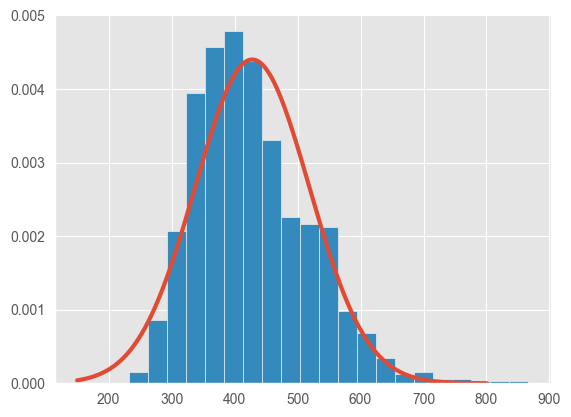

In [130]:
x = np.linspace(150, 800, 10000)
norm_rv = stats.norm(loc=m, scale=s)
pdf = norm_rv.pdf(x)

# плотность
plt.plot(x, pdf, lw=3)

plt.hist(X, bins=bins_number, density=True);

In [131]:
def chisquare_normal(dist, m, d, bins, ddof=2):
    counts, bins1 = np.histogram(dist, bins=bins)
    normal = (stats.norm.cdf(bins1[1:], m, d) - stats.norm.cdf(bins1[:-1], m, d)) * dist.shape[0]
    Z = np.sum((counts - normal) ** 2 / normal)
    return Z, 1 - stats.chi2.cdf(Z, bins - ddof - 1)

In [132]:
chisquare_normal(X, m, s, bins_number)

(530.8011077398498, 0.0)

In [133]:
stats.jarque_bera(X)

Jarque_beraResult(statistic=162.56186413710836, pvalue=0.0)